# STEP 1: Business Understanding

 Our goal is to find which machine learning model is best suited to predict sentiment (output) given a customer quality complaint (input).
 This will enable the quality department to quickly identify which customer related grouping is the most problematic and address formulation issues accordingly
 Help us identify what keywords customers associate with different types of formulation issues

# STEP 2: Analytical Approach, Data Requirement,Data Collection and Data Understanding

2.1. Analytical Approach: Multi-Class Classification using SVM, Decision Tree, Naive Bayes and Logistic Regression using bag of words as the text representation technique since we are concerned with the words but not their order

2.2. Data Requirements : Require labelled dataset showing different quality reason codes associated with different customer complaint descriptions. The complaint descriptions will needs to be converted from text to numerical values before being used in the classification models. The reviews need to be formatted prior to conversion using the text representation technique

2.3. Data collection:
 > Data set is from the customer complaints department containing 3022 entries
 > No sql required for database extraction
 > The dataset contains 2 columns (customer complaint and complaint grouping) that will help us identify what customer description falls under which complaint grouping


##### 2.4. Data Understanding (Exploratory Data Analysis/Descriptive statistics/data visualization)

In [1]:
# Read the dataset

import pandas as pd  
pd.set_option('display.max_columns', 2) 
df_Complaints= pd.read_excel('CustomerComplaints.xlsx') 
df_Complaints.head(10) 
print(df_Complaints) 




                                        Reason Reason group
0                                Lumpy product        Lumpy
1                                Lumpy product        Lumpy
2                     Incorrect product inside       Colour
3      Colour not matching Product Colour Card       Colour
4     Colour not matching product Colour guide       Colour
...                                        ...          ...
3016                             Viscosity Low    Viscosity
3017                          Washability poor        Bitty
3018                         Yellowing Product    Yellowing
3019                         Yellowing Product    Yellowing
3020                         Yellowing Product    Yellowing

[3021 rows x 2 columns]


> As can be seen the data consists of 3020 rows
> will take a subset for modelling


In [2]:
# Check the datatype of each column to identify if columns have numerical or categorical variables which is important before cleaning the data
df_Complaints.dtypes

Reason          object
Reason group    object
dtype: object

In [3]:
# Find the description of the dataset
pd.set_option('display.max_rows', None)
df_Complaints.describe()

# what does this tell you: 3021 reasons for customer complaints and 3019 reason groups. 99 unique reason codes and 109 unique reasons. Top issue is gelling.

,Reason,Reason group
count,3021,3019
unique,109,99
top,Gelled,Gelled
freq,468,365


In [4]:
# find a summary of the dataset
import pandas as pd
pd.set_option('display.max_rows', 40)
df_Complaints.info()

# all columns have non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Reason        3021 non-null   object
 1   Reason group  3019 non-null   object
dtypes: object(2)
memory usage: 47.3+ KB


# STEP 3: DATA PREPARATION (Python or SQL)

####               3.1. OVERSAMPLING AND UNDERSAMPLING (OPTIONAL DEPENDING IF REQUIRED) 

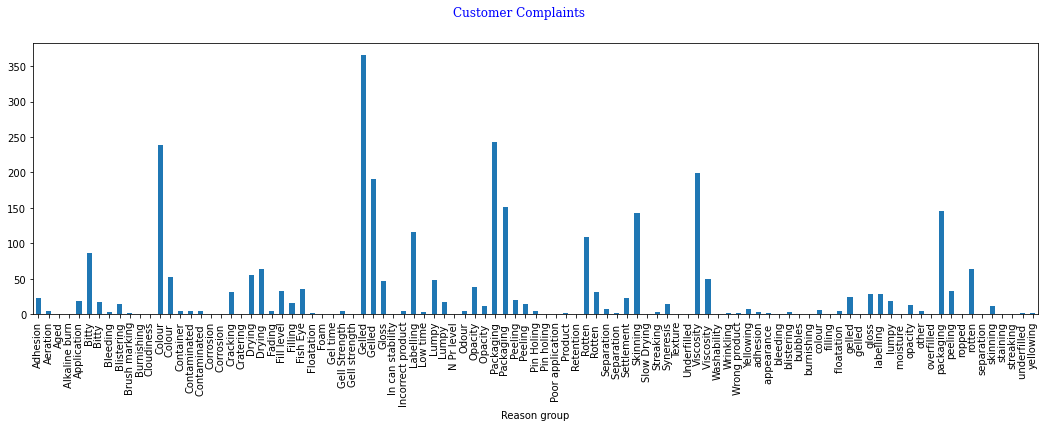

In [5]:
#No oversamling or undersampling is required

import matplotlib.pyplot as plt  # import pyplot to draw bar graph

f, ax = plt.subplots(figsize=(18,5))

font1 = {'family':'serif','color':'blue','size':10}      
font2 = {'family':'serif','color':'darkred','size':15}

plt.suptitle("Customer Complaints",fontdict = font1)     
df_gb = df_Complaints.groupby(['Reason group']).size()

df_gb.plot.bar()
plt.show()   

#### 3.2. CLEAN THE DATA

In [6]:
# find all missing data
df_Complaints.isnull().sum().sort_values(ascending=False)   # counts null values and arranges columns in ascending order with the most missing values

# in percentage form

# % of rows missing in each column
for column in df_Complaints.columns:   # loops through columns in dataframe
    percentage = df_Complaints[column].isnull().mean()   # find the percentage of each null value
    print(f'{column}: {round(percentage*100, 2)}%')   # rounds percentage to 2 decimal places. Using F string to seperate value from string
    
# For the given dataset there are missing Reason group values

Reason: 0.0%
Reason group: 0.07%


In [7]:
#Dealing with missing values will be done by removing the rows that have missing values since there are few entries

df_Complaints = df_Complaints.dropna(subset=['Reason group'])   #dropna can automatically drop the null values in the row

df_Complaints.describe() 

,Reason,Reason group
count,3019,3019
unique,109,99
top,Gelled,Gelled
freq,468,365


In [8]:
df_Complaints.isnull().sum().sort_values(ascending=False)
# as can be seen new dataframe has no null values

Reason          0
Reason group    0
dtype: int64

In [9]:
pip install nltk

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pragesh.govender\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Make a copy of the DataFrame to avoid unintentional copy issues
df_normalized = df_Complaints.copy()

# Normalize 'Reason' column: Convert to lowercase and remove whitespace/punctuation
df_normalized['Reason'] = df_normalized['Reason'].apply(lambda x: x.lower().strip())
df_normalized['Reason'] = df_normalized['Reason'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Normalize 'Reason group' column: Convert to lowercase and remove whitespace/punctuation
df_normalized['Reason group'] = df_normalized['Reason group'].apply(lambda x: x.lower().strip())
df_normalized['Reason group'] = df_normalized['Reason group'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenization: Tokenize 'Reason' column
df_normalized['tokenized_text'] = df_normalized['Reason'].apply(word_tokenize)

# Stopword Removal: Remove stopwords from 'tokenized_text' column
stop_words = set(stopwords.words('english'))
df_normalized['tokenized_text'] = df_normalized['tokenized_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

# Stemming or Lemmatization: Apply lemmatization to 'tokenized_text' column
lemmatizer = WordNetLemmatizer()
df_normalized['tokenized_text'] = df_normalized['tokenized_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Display the updated DataFrame with normalized and tokenized text
print(df_normalized.head())

                                     Reason  ...  \
0                             lumpy product  ...   
1                             lumpy product  ...   
2                  incorrect product inside  ...   
3   colour not matching product colour card  ...   
4  colour not matching product colour guide  ...   

                               tokenized_text  
0                            [lumpy, product]  
1                            [lumpy, product]  
2                [incorrect, product, inside]  
3   [colour, matching, product, colour, card]  
4  [colour, matching, product, colour, guide]  

[5 rows x 3 columns]


# STEP 4: TRAINING OF MODEL ON PYTHON

#### 4.1. Split data into train and test set

In [12]:
#Before we work with our data, we need to split it into a train and test set. 
#The train dataset will be used to fit the model,
# while the test dataset will be used to provide an unbiased evaluation of a final model fit on the training dataset.

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_normalized, test_size=0.33, random_state=42)  #33% to test the data

#set independent and dependent variables in the train and test set
train_x, train_y = train['Reason'], train['Reason group']   #y is the target variable that needs to be predicted by the model
test_x, test_y = test['Reason'], test['Reason group']



#### 4.2. Turning Text Data Into Numerical Values

In [13]:
# need to turn customer complaint terms into numerical values for classifier/learning algorithm
# various text representation techniques such as one-hot-coding, bag of words, wor2vec
# bag of words will be used as the technique since we care about the frequency of words in the text review and order of words is irrelevant
# can be represented as Countervectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)
# In our original dataset, we want to identify unique/representative words for each quality reason grouping, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF, we write the following code.

from sklearn.feature_extraction.text import TfidfVectorizer      

train, test = train_test_split(df_normalized, test_size=0.33, random_state=42)  #copied from above

#set independent and dependent variables in the train and test set
train_x, train_y = train['Reason'], train['Reason group']   
test_x, test_y = test['Reason'], test['Reason group']      


tfidf = TfidfVectorizer(stop_words='english')
# Note: We could better prepare the text data in order to develop better models 
# by using tokenization and removing extra words we consider irrelevant apart from the 
#stopword list CountVectorizer and Tfidf have by default. 
# Check the article below for more information about tokenization with Python [https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4]


train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

#In the code above, we create a new instance of TfidfVectorizer(tfidf),
#we removed English stopwords and then fit (finds the internal parameters of a model) 
#and transform (applies the parameters to the data) the train_x (customer complaints)


<2022x143 sparse matrix of type '<class 'numpy.float64'>'
	with 4315 stored elements in Compressed Sparse Row format>

In [14]:
#Matrix displayed visually
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,adhering,...,yellowing
1271,0.0,...,0.0
644,0.0,...,0.0
2957,0.0,...,0.0
945,0.0,...,0.0
1178,0.0,...,0.0
...,...,...,...
1639,0.0,...,0.0
1096,0.0,...,0.0
1131,0.0,...,0.0
1295,0.0,...,0.0


In [15]:
# Check the datatype of train_x_vector
print("Type of train_x_vector:", type(train_x_vector))

# Check if train_x_vector contains any non-numeric values
contains_strings = any(isinstance(val, str) for val in train_x_vector)
print("Contains strings in train_x_vector:", contains_strings)

Type of train_x_vector: <class 'scipy.sparse.csr.csr_matrix'>
Contains strings in train_x_vector: False


In [16]:
# transform the test data set x so that can test the efficiency of the model later on

test_x_vector = tfidf.transform(test_x)
test_x_vector

<997x143 sparse matrix of type '<class 'numpy.float64'>'
	with 2122 stored elements in Compressed Sparse Row format>

#### 4.3. Training

* with the numerical data, can experiment with different machine learning models and evaluate their accuracy
* Machine learning algorithms are divided between supervised learning and unsupervised learning. 
* In the first, models are trained using labeled data, while in the second 
* patterns are inferred from the unlabeled input data.
* In our example, our input (review) and output (sentiment) are clearly identified, 
* so we can say we have labeled input and output data; 
* therefore, we’re dealing with supervised learning. 
* Two common types of supervised learning algorithms are Regression and Classification.
> Regression: They’re used to predict continuous values such as price, salary, age, etc
> Classification: They’re used to predict discrete values such as male/female, spam/not spam, positive/negative, etc.

* That said, it’s now evident that we should use classification algorithms. 
* We will benchmark the following four classification models (SVM, Decision Tree, Naive Bayes, Logistic Regression)


### 4.3.1. Model 1: Support Vector Machines

In [17]:
# start by fitting the model with the training set. X vector (text reviews as numerical vectors) and output y (sentiment)
# have to run each block or else it wont work in preceding evaluation


#The SVM algorithm offers a choice of kernel functions for performing its processing. 
#Basically, mapping data into a higher dimensional space is called kernelling. 
#The mathematical function used for the transformation is known as the kernel function, 
#and can be of different types, such as:
    
#1.Linear
#2.Polynomial
#3.Radial basis function (RBF)
#4.Sigmoid

#Each of these functions has its characteristics, its pros and cons, and its equation, 
#but as there's no easy way of knowing which function performs best with any given dataset. 
#We usually choose different functions in turn and compare the results. 
#Let's just use the default, RBF (Radial Basis Function) for this lab.

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

# can then use predict method to predict whether a review is positive or negative

print(svc.predict(tfidf.transform(['bitty paint'])))   # transforming different strings with keywords then testing it against fitted SVC model
print(svc.predict(tfidf.transform(['opacity issues in paint'])))
print(svc.predict(tfidf.transform(['Color does not match'])))

['bitty']
['bitty']
['colour']


In [18]:
# as can be seen plugging in some general complaints matches with the correct reason group

#### 4.3.2.Model 2: Decision Tree

In [19]:
#We will first create an instance of the DecisionTreeClassifier called dec
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

from sklearn.tree import DecisionTreeClassifier   # importing decision tree classifier from sklearn
dec_tree = DecisionTreeClassifier()               # creating instance
dec_tree.fit(train_x_vector, train_y)             # training model

decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
#predict with model

predTree = dec_tree.predict(test_x_vector)

# print out actual Y and predicted Y to visually see accuracy
print (predTree [0:5])
print (test_y [0:5])

['filling' 'gelled' 'skinning' 'labelling' 'gelled']
1412    fill level
1564        gelled
203       skinning
1407     labelling
52          gelled
Name: Reason group, dtype: object


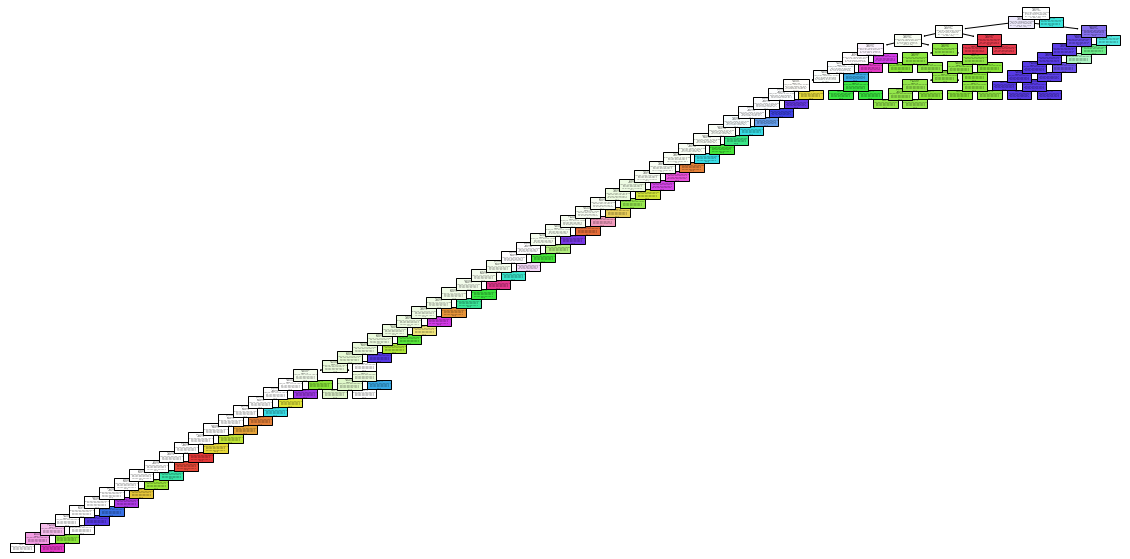

In [21]:
#visualize tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dec_tree, filled=True)
plt.show()

#### 4.3.3. Model 3: Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB           
gnb = GaussianNB()                   
gnb.fit(train_x_vector.toarray(), train_y)        # need to convert to array before fitting model

GaussianNB()

### 4.3.4. Model 4: Logistic Regression

* Let's build our model using LogisticRegression from the Scikit-learn package
* This function implements logistic regression and can use different numerical optimizers to find parameters,
* including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 
* You can find extensive information about the pros and cons of these optimizers if you search it in the internet.
* The version of Logistic Regression in Scikit-learn, support regularization. 
* Regularization is a technique used to solve the overfitting problem of machine learning models. 
* C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.01, solver='liblinear')
log_reg.fit(train_x_vector, train_y)

LogisticRegression(C=0.01, solver='liblinear')

#### 4.4. Model Tuning

* This is used to maximize the model performance
* The grid search method will be used
* This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters. 

* other examples of tuning: 

> * Bayesian Optimisation
> * Evolutionary Algorithms
> * Gradient-Based Optimisation. ...
> * Grid Search. ...
> * Keras' Tuner. ...
> * Population-based Optimisation. ...
> * ParamILS. ...
> * Random Search.



In [24]:
# model tuning for svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC



# Define the parameters grid
parameters = {'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']}

# Initialize SVC and GridSearchCV with parameters and cross-validation
svc = SVC()
loo = LeaveOneOut()
svc_grid = GridSearchCV(svc, parameters, cv=loo)

# Fit GridSearchCV to filtered training data
svc_grid.fit(train_x_vector, train_y)

# Display best parameters and best estimator
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'linear'}
SVC(C=4, kernel='linear')


In [25]:
#model tuning for decision tree

from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameters grid for Decision Tree
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with parameters and cross-validation (Leave-One-Out)
loo = LeaveOneOut()
dt_grid = GridSearchCV(dt, parameters, cv=loo)

# Assuming train_x_vector and train_y are your training data and labels
# Fit GridSearchCV to filtered training data
dt_grid.fit(train_x_vector, train_y)

# Display best parameters and best estimator
print("Best Parameters:", dt_grid.best_params_)
print("Best Estimator:", dt_grid.best_estimator_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier()


In [26]:
# Model tuning for naive bayes

# Define the parameters grid for Gaussian Naive Bayes
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Initialize GridSearchCV with parameters and cross-validation (Leave-One-Out)
loo = LeaveOneOut()
gnb_grid = GridSearchCV(gnb, parameters, cv=loo)

# Fit GridSearchCV to filtered training data
gnb_grid.fit(train_x_vector.toarray(), train_y)

# Display best parameters and best estimator
print("Best Parameters:", gnb_grid.best_params_)
print("Best Estimator:", gnb_grid.best_estimator_)

Best Parameters: {'var_smoothing': 1e-09}
Best Estimator: GaussianNB()


# STEP 5: MODEL EVALUATION

#### 5.1. Mean Accuracy

In [28]:
# .score method with the training set is used

print('svc_grid:',round(svc_grid.score(test_x_vector, test_y),2))
print('dt_grid:', round(dt_grid.score(test_x_vector, test_y),2))
print('gnb_grid:',round(gnb_grid.score(test_x_vector.toarray(), test_y),2))
print('log_reg:',round(log_reg.score(test_x_vector, test_y),2))


svc_grid: 0.92
dt_grid: 0.92
gnb_grid: 0.39
log_reg: 0.69


In [ ]:
# As can be seen by the mean accuracy - SVM and decision trees perform better than the other models 



#### 5.3. Classification Report


In [37]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_svc = svc_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_svc.predict(test_x_vector)

# Generate a classification report
report = classification_report(test_y, predicted_labels, output_dict=True,zero_division=1)

# Extract class names and metrics from the report
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg' keys

# Iterate through each class and print classification metrics
for class_name in class_names:
    metrics = report[class_name]
    precision = metrics['precision']
    recall = metrics['recall']
    f1_score = metrics['f1-score']
    support = metrics['support']
    
    # Print classification metrics for the current class
    print(f"Metrics for {class_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print(f"Support: {support}")
    print()  # Add a newline for readability

Metrics for adhesion:
Precision: 1.0000
Recall: 0.9000
F1-score: 0.9474
Support: 10

Metrics for aeration:
Precision: 0.5000
Recall: 1.0000
F1-score: 0.6667
Support: 1

Metrics for alkaline burn:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 1

Metrics for appearance:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 1

Metrics for application:
Precision: 0.8000
Recall: 0.5714
F1-score: 0.6667
Support: 7

Metrics for bitty:
Precision: 0.9722
Recall: 0.9211
F1-score: 0.9459
Support: 38

Metrics for bleeding:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 3

Metrics for blistering:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Support: 7

Metrics for brush marking:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Support: 1

Metrics for bubbles:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 1

Metrics for colour:
Precision: 0.8240
Recall: 0.9904
F1-score: 0.8996
Support: 104

Metrics for container:
Precision: 1.0000
Recall: 0.0000
F1-sc

In [38]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_dt = dt_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_dt.predict(test_x_vector)

# Generate a classification report
report = classification_report(test_y, predicted_labels, output_dict=True,zero_division=1)

# Extract class names and metrics from the report
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg' keys

# Iterate through each class and print classification metrics
for class_name in class_names:
    metrics = report[class_name]
    precision = metrics['precision']
    recall = metrics['recall']
    f1_score = metrics['f1-score']
    support = metrics['support']
    
    # Print classification metrics for the current class
    print(f"Metrics for {class_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print(f"Support: {support}")
    print()  # Add a newline for readability

Metrics for adhesion:
Precision: 1.0000
Recall: 0.9000
F1-score: 0.9474
Support: 10

Metrics for aeration:
Precision: 0.5000
Recall: 1.0000
F1-score: 0.6667
Support: 1

Metrics for alkaline burn:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 1

Metrics for appearance:
Precision: 0.5000
Recall: 1.0000
F1-score: 0.6667
Support: 1

Metrics for application:
Precision: 0.8000
Recall: 0.5714
F1-score: 0.6667
Support: 7

Metrics for bitty:
Precision: 0.9722
Recall: 0.9211
F1-score: 0.9459
Support: 38

Metrics for bleeding:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 3

Metrics for blistering:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Support: 7

Metrics for brush marking:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Support: 1

Metrics for bubbles:
Precision: 1.0000
Recall: 0.0000
F1-score: 0.0000
Support: 1

Metrics for colour:
Precision: 0.8879
Recall: 0.9904
F1-score: 0.9364
Support: 104

Metrics for container:
Precision: 1.0000
Recall: 0.0000
F1-sc

#### 5.3. Confusion Matrix

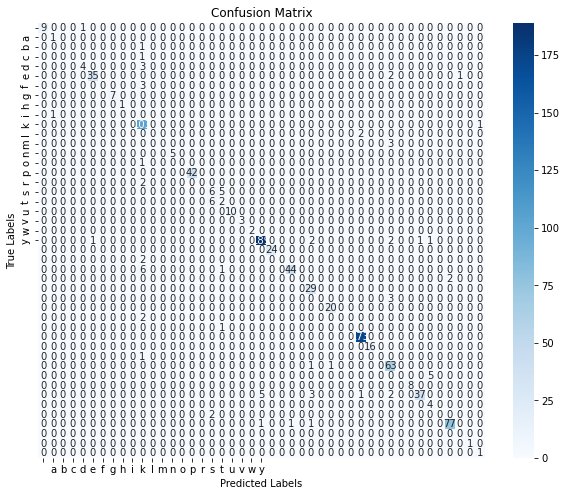

In [51]:
# for SVM model 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_svc = svc_grid.best_estimator_

# Predict labels on the test set
y_pred = best_svc.predict(test_x_vector)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

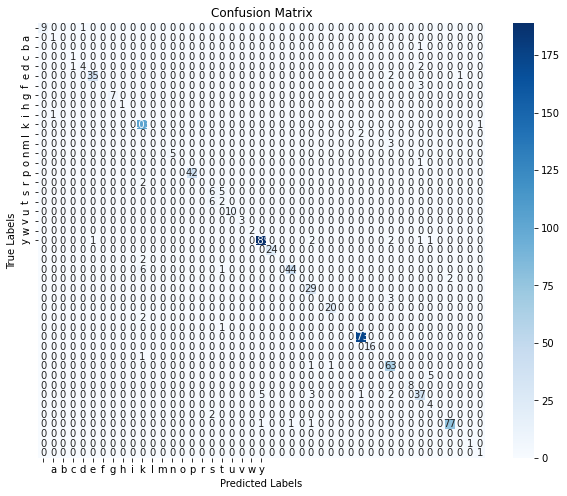

In [52]:
# for decision tree model 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_dt= dt_grid.best_estimator_

# Predict labels on the test set
y_pred = best_dt.predict(test_x_vector)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Both models seem to be performing fairly well, however collecting more samples for the under-represented classes will improve the reliability of the model 

# STEP 6: Model Deployment/Consumption